Welcome to Deep Search Relevance Ranking Session1- Part1! 😀 

In this session, we will cover the following algorithms: 
- Part 1: BM25 
- Part 2: Vector Space Model 

# Part 1: BM-25

In this section,  we'll work through the BM25 algorithm and we will use xglue (https://huggingface.co/datasets/xglue/viewer/qadsm) to practice.

# Loading the dataset 
We will use the 🤗 Datasets library to download the data and run our algorithms.

This can be done with the functions load_dataset and load_metric.
We will use XGlue during all of our sessions: https://huggingface.co/datasets/xglue/viewer/qadsm/

The dataset used in this tutorial is Microsoft Query-Ad Matching (QADSM) dataset which is part of the XGLUE benchmark. XGLUE is a new benchmark dataset for cross-lingual pre-training, understanding and generation.

In [ ]:
! pip install datasets transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 346 kB 6.2 MB/s 
     |████████████████████████████████| 4.2 MB 11.1 MB/s 
     |████████████████████████████████| 86 kB 3.9 MB/s 
     |████████████████████████████████| 212 kB 43.8 MB/s 
     |████████████████████████████████| 140 kB 20.1 MB/s 
     |████████████████████████████████| 1.1 MB 54.2 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 596 kB 40.0 MB/s 
     |████████████████████████████████| 127 kB 48.3 MB/s 
     |████████████████████████████████| 6.6 MB 40.8 MB/s 
     |████████████████████████████████| 271 kB 34.3 MB/s 
     |████████████████████████████████| 94 kB 3.7 MB/s 
     |████████████████████████████████| 144 kB 60.8 MB/s 
     |████████████████████████████████| 112 kB 50.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling

In [ ]:
from datasets import load_dataset, load_metric

In [ ]:
xglue = load_dataset('xglue', 'qadsm')

Generating train split:   0%|          | 0/100000 [00:00<?, ? examples/s]

Generating validation.en split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating validation.de split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating validation.fr split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test.en split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test.de split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test.fr split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset x_glue downloaded and prepared to /root/.cache/huggingface/datasets/x_glue/qadsm/1.0.0/8566eedecd9ab28e01c051c023dadf97bf408e5195f76b06aba70ebd4697ae08. Subsequent calls will reuse this data.


  0%|          | 0/7 [00:00<?, ?it/s]

#### Dataset overview

In [ ]:
print(xglue)

DatasetDict({
    train: Dataset({
        features: ['query', 'ad_title', 'ad_description', 'relevance_label'],
        num_rows: 100000
    })
    validation.en: Dataset({
        features: ['query', 'ad_title', 'ad_description', 'relevance_label'],
        num_rows: 10000
    })
    validation.de: Dataset({
        features: ['query', 'ad_title', 'ad_description', 'relevance_label'],
        num_rows: 10000
    })
    validation.fr: Dataset({
        features: ['query', 'ad_title', 'ad_description', 'relevance_label'],
        num_rows: 10000
    })
    test.en: Dataset({
        features: ['query', 'ad_title', 'ad_description', 'relevance_label'],
        num_rows: 10000
    })
    test.de: Dataset({
        features: ['query', 'ad_title', 'ad_description', 'relevance_label'],
        num_rows: 10000
    })
    test.fr: Dataset({
        features: ['query', 'ad_title', 'ad_description', 'relevance_label'],
        num_rows: 10000
    })
})


In [ ]:
xglue['train'].shape

(100000, 4)

In [ ]:
xglue['train'][0:2] 

{'ad_description': ['Your New England Cruise Awaits! Holland America Line Official Site.',
  'Explore Your World with Four Extraordinary Offers.'],
 'ad_title': ['New England Cruises', 'Holland America Line®'],
 'query': ['cruise portland maine', 'transportation to cruise port miami'],
 'relevance_label': [1, 0]}

In [ ]:
xglue['train']['ad_description'][0:2] 

['Your New England Cruise Awaits! Holland America Line Official Site.',
 'Explore Your World with Four Extraordinary Offers.']

# BM25 Model Implementation for Search Ranking

#### create docs from train dataset using "ad_description". Here we use a small subset in our demo.

In [ ]:
docs = xglue['train']['ad_description'][0:10]
docs = [el.split() for el in docs]

In [ ]:
docs[0:2]

[['Your',
  'New',
  'England',
  'Cruise',
  'Awaits!',
  'Holland',
  'America',
  'Line',
  'Official',
  'Site.'],
 ['Explore', 'Your', 'World', 'with', 'Four', 'Extraordinary', 'Offers.']]

The BM25 algorithm can look like TF-IDF. Let's start with TF-IDF first.

In [ ]:
import numpy as np

def tfidf(word, sentence):
    # term frequency
    tf = sentence.count(word) / len(sentence)
    # inverse document frequency
    idf = np.log10(len(docs) / sum([1 for doc in docs if word in doc]))
    return round(tf*idf, 4)

In [ ]:
# tfidf('purple', a)  # let's calculate TF-IDF for our query 'purple' and doc a

BM25 includes TF and an IDF component. 

The **TF** component includes the query frequency, and total number of terms as with TF-IDF, but we add two special parameters `k` and `b` which we can use to optimize our algorithm, but by default we choose the values of `1.2` and `0.75` respectively. We also include two values - `avgdl`, the average length of *all* documents, and *D*, the length of the current document (`len(doc)`).

The **IDF** component inlcudes the parametes `N` and `N_q`, which are the number of documents and the number of documents *that contain*  query, respectively. 

In [ ]:
avgdl = sum(len(sentence) for sentence in docs) / len(docs) 
N = len(docs)

def bm25(word, sentence, k=1.2, b=0.75):
    # term frequency
    freq = sentence.count(word)  # or f(q,D) - freq of query in Doc
    tf = (freq * (k + 1)) / (freq + k * (1 - b + b * len(sentence) / avgdl))
    # inverse document frequency
    N_q = sum([1 for doc in docs if word in doc])  # number of docs that contain the word
    idf = np.log(((N - N_q + 0.5) / (N_q + 0.5)) + 1)
    return round(tf*idf, 4)

### multiple terms in one query 

In [ ]:
def get_scores(query, docs):
        score = np.zeros(len(docs))
        for q in query:
          # print ("q=",q)
          tmp_score = np.array([ bm25(q,sentence) for sentence in docs])
          # print("tmp_score=",tmp_score)
          score += tmp_score 
        return score


In [ ]:
# bm25("Explore",docs[1])
# docs[1] #['Explore', 'Your', 'World', 'with', 'Four', 'Extraordinary', 'Offers.']
get_scores(["Explore"],docs)

array([0.    , 1.7307, 0.    , 1.4172, 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    ])

### get top-k docs from given query

In [ ]:
def get_top_n(query, docs, n=2):
        scores = get_scores(query,docs)
        top_n = np.argsort(scores)[::-1][:n]
        return [docs[i] for i in top_n]

In [ ]:
get_top_n(["Explore"],docs, n=2)

[['Explore', 'Your', 'World', 'with', 'Four', 'Extraordinary', 'Offers.'],
 ['Sign',
  'Up',
  'for',
  'Offers',
  'and',
  'Explore',
  'the',
  'Caribbean',
  'with',
  'Holland',
  'America',
  'Line']]

Get matrix computation

In [ ]:
#https://github.com/dorianbrown/rank_bm25/blob/990470ebbe6b28c18216fd1a8b18fe7446237dd6/rank_bm25.py#L19 


# BM25 and TF-IDF Study including k and b

---

### BM25 Vectors

Show sparse vector representations of each document using BM25 algorithm:

In [ ]:
flat_words = [word for doc in docs for word in doc]
vocab = set(flat_words)
print(vocab)

{'Your', 'Awaits!', 'Holland', 'Now.', 'Ship', 'Virtual', 'Today', 'on', 'Take', 'Caribbean', 'Tour,', 'Videos', 'Free', 'a', 'with', 'for', 'England', 'Low', 'Four', 'Prices', 'Offers.', 'Up', 'For', 'Jewelry', 'the', '&', 'More', 'and', 'Site', 'Explore', 'Own', 'Zales!', 'From', '-', 'Offers,', 'to', 'Watch', 'Official', 'Line', 'Beautiful', 'At', 'Cruise', 'Site.', 'Special', 'Sign', 'America', 'Caribbean.', '$149+', 'Extraordinary', 'Orders', 'Ships.', 'Today.', 'Canada', 'Island', 'New', 'More.', 'In', 'Learn', 'Cruises.', 'Private', 'about', 'Website', 'Offers', 'World'}


In [ ]:
vec = []
# we will create the BM25 vector for sentence docs[0]
for word in vocab:
    vec.append(bm25(word, docs[0]))
print(vec)

[0.9217, 1.5279, 0.9217, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5279, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7148, 0.9217, 0.0, 0.0, 0.9217, 1.1809, 0.0, 0.0, 0.9217, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5279, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


---

### BM25 and TF-IDF Study


In [ ]:
def tfidf_viz(w, s, n_t):
    tf = w / s
    idf = np.log10(len(docs) / n_t)
    return tf, idf

def bm25_viz(w, s, N_t, k=1.2, b=0.75):
    tf = (w * (k + 1)) / (w + k * (1 - b + b * (s / avgdl)))
    idf = np.log10(((N - N_t + 0.5) / (N_t + 0.5)) + 1)
    return tf, idf

 Run through tf-idf and bm25scores for term frequencies in below:

In [ ]:
tfidf_scores = []
bm25_scores = []

for i in range(12):
    tfidf_scores.append(tfidf_viz(i, avgdl, 2))
    bm25_scores.append(bm25_viz(i, avgdl, 2))

In [ ]:
import matplotlib.pyplot as plt

 TF and IDF plot seperately:

In [ ]:
tfidf_tf = [x[0] for x in tfidf_scores]
tfidf_idf = [x[1] for x in tfidf_scores]

bm25_tf = [x[0] for x in bm25_scores]
bm25_idf = [x[1] for x in bm25_scores]

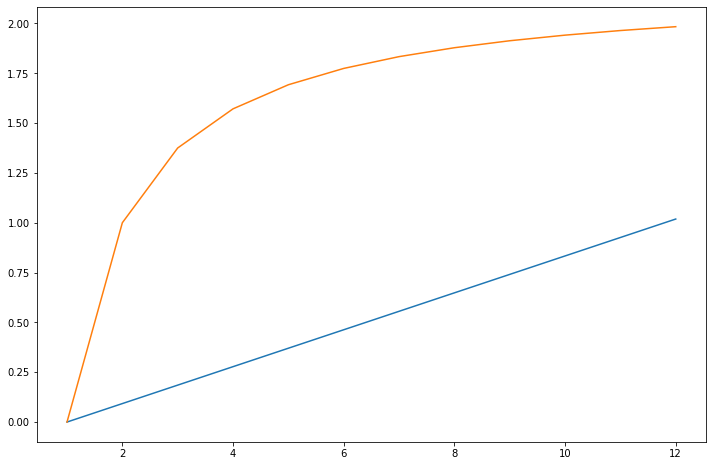

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(list(range(1, len(tfidf_tf)+1)), tfidf_tf)
plt.plot(list(range(1, len(bm25_tf)+1)), bm25_tf)

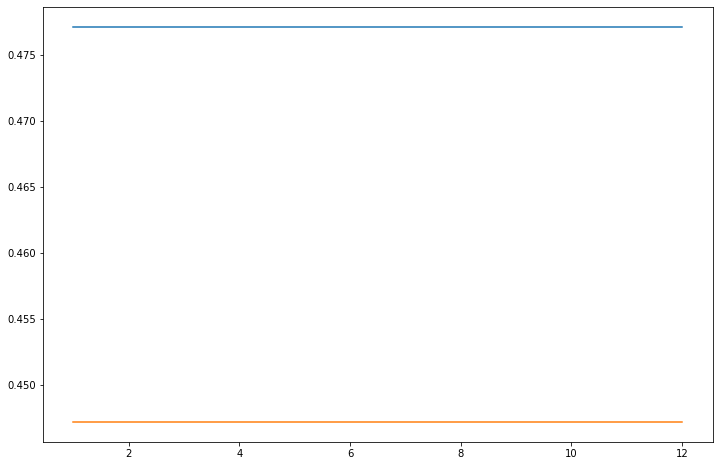

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(list(range(1, len(tfidf_idf)+1)), tfidf_idf)
plt.plot(list(range(1, len(bm25_idf)+1)), bm25_idf)

In [ ]:
# calculate  tf*idf
tfidf_tfidf = [tf*idf for tf, idf in zip(tfidf_tf, tfidf_idf)]
bm25_tfidf = [tf*idf for tf, idf in zip(bm25_tf, bm25_idf)]

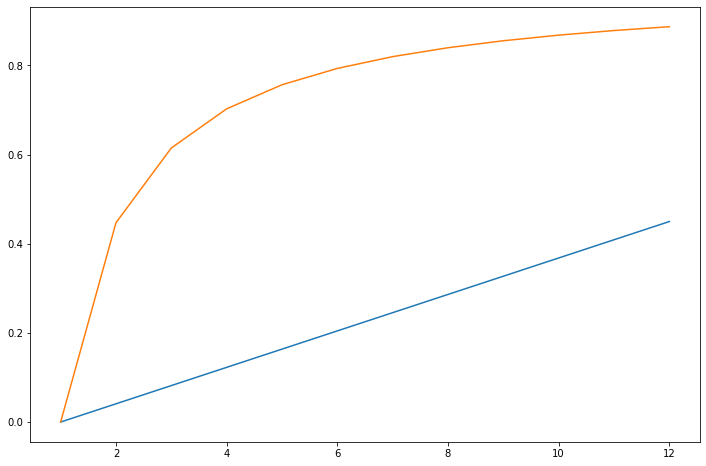

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(list(range(1, len(tfidf_tfidf)+1)), tfidf_tfidf)
plt.plot(list(range(1, len(bm25_tfidf)+1)), bm25_tfidf)

From the experiment,  doubling the number of relevant tokens from 2 to 4 doubles the TF*IDF score, but for BM25 it increases by a factor of 1.25. While the TF*IDF score doubles with every doubling of relevant tokens, the scaling factor of BM25 decreases. From 4 to 8 tokens the factors are x2 and x1.13 respectively.

| # of relevant tokens | TF*IDF | BM25 |
| --- | --- | --- |
| 1 | 0.04 | 0.45 |
| 2 | 0.08 | 0.61 |
| 4 | 0.16 | 0.76 |
| 8 | 0.33 | 0.86 |

(0.0, 0.47235004217246584)

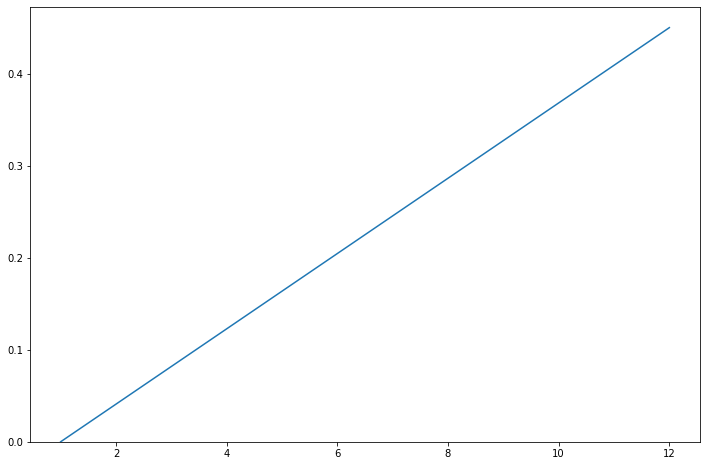

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(list(range(1, len(tfidf_tfidf)+1)), tfidf_tfidf)
plt.ylim(0, plt.ylim()[-1])

(0.0, 0.9313348833119501)

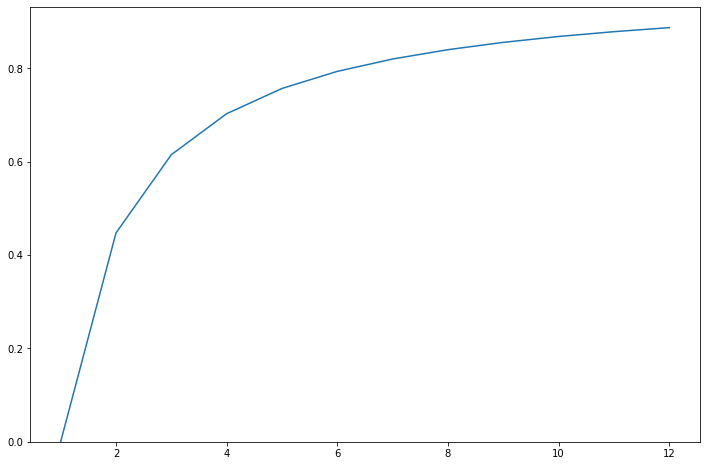

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(list(range(1, len(bm25_tfidf)+1)), bm25_tfidf)
plt.ylim(0, plt.ylim()[-1])

### Conclusion: